<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3 - Enhancing Efficiency in Service Transformation through Differentiation of Customers' Reddit Posts (Web APIs and Classification)
_Author: Jason Chia (JC)_

---
## Problem Statement and Executive Summary
---
With the advent of the digital age, people from various industries (such as the service industry), feel empowered to express their opinion and relate their experiences at work online on platforms like [Reddit](https://www.reddit.com/). It is therefore criticial for organizations that supply the service industry with service staff as well as trade unions such as the [National Trades Union Congress (NTUC)](https://www.ntuc.org.sg/wps/portal/up2/home/industrialrelations/unionsandu) to be aware of these online staff feedback so that they can take actions to address staff's concerns/dissatisfaction (which would otherwise not be expressed in the workplace directly to the management) and in turn improve service standards, thereby remaining competitive and maximizing customer satisfaction in the long run.

However, with staff becoming more vocal online (and uploading lengthy posts) and the real possibility of similarities (such as whether staff treatment is just or not) in online posts between similar but different types of service staff (such as front desk staff and servers in dining establishments), it is onerous and time-consuming for the different organizations and agencies to read each post thoroughly in order to filter out posts relevant to them. 

This is where the solution I am about to present comes in handy! I have developed a model to effectively predict the category of a given post based on its content so that the different organizations can proceed directly to address posts meant for them, thereby eliminating the need to filter out relevant posts beforehand and hence, maximizing business efficiency!

For this project, I have web-scraped 2 similar but different subreddits pertaining to the service industry ([```TalesFromYourServer```](https://www.reddit.com/r/TalesFromYourServer) and [```TalesFromFrontDesk```](https://www.reddit.com/r/TalesFromTheFrontDesk) to form a dataset, from which the solution is demonstrated. Two machine learning classification models - Logistic Regression and Naive Bayes classifier were evaluated with classification metrics such as accuracy, ROC AUC etc. on the dataset to determine which performs best. The best model was then used to predict the category of a given post (whether it belongs to the ```TalesFromYourServer``` or ```TalesFromFrontDesk``` subreddits) and it demonstrated an astounding classfication accuracy of 96%!!

This proposal presents a foundational predictive model to be built upon (as more relevant data is collected to train it) and will add value to organizations such as recruitment firms that hire servers such as waitresses, busboys, bartenders and those that hire front desk staff, as well as trade unions and organizations like NTUC, by pre-filtering online staff feedback for them to address and/or take action(s) on. This can facilitate near-real-time service transformation that will in turn boost customers' experiences in the long run!

The specifics of this proposal such as data cleaning, processing, exploratory data analysis, modelling etc. will be unveiled in the following sections of the notebook. 

---



# Contents
---

- [Data Collection and Cleaning](#Data-Collection-and-Cleaning)
- [Feature Engineering](#Feature-Engineering)
- [Feature and Target Definitions and Preprocessing](#Feature-and-Target-Definitions-and-Preprocessing)
- [Exploratory Data Analysis of Preprocessed Texts](#Exploratory-Data-Analysis-of-Preprocessed-Texts)
- [Modelling and Hyperparameter Tuning](#Modelling-and-Hyperparameter-Tuning)
- [Interpretation of Results](#Interpretation-of-Results)
- [Model Evaluation and Limitations](#Model-Evaluation-and-Limitations)
- [Conclusion and Business Recommendations](#Conclusion-and-Business-Recommendations)
- [Sources](#Sources)

# Data Collection and Cleaning 
---
[Click here to go back to Contents](#Contents)
### Web-scraping using Reddit's API
- But first and foremost - importing the required libraries...
- For wordcloud, kindly run the following lines of code in a Terminal (for Mac users) or command prompt window (for Windows Users - need to format code accordingly) to download and install wordcloud. More information on how to download and use it can be found [here](https://www.datacamp.com/community/tutorials/wordcloud-python)<br>
<img src="../images/wordcloud_install_instructions.png"/><br>
- The following additional imports seem to be relevant, if not required, to run the wordcloud smoothly. Kindly import these first if you would like to uncomment the wordcloud-generation codes further down below to try generating wordclouds yourself!<br>
<img src="../images/imports_for_wordcloud.png"/>


In [1]:
import requests
import time
import random
#from os import path   #uncomment these if you have downloaded and installed wordcloud based on the instructions above
#from PIL import Image
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import WordNetLemmatizer
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import stop_words
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/jasonchia/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#url1 = 'https://www.reddit.com/r/TalesFromYourServer.json' #url for TalesFromYourServer subreddit

In [3]:
#url2 = 'https://www.reddit.com/r/TalesFromTheFrontDesk.json' #url for TalesFromTheFrontDesk subreddit

In [4]:
#posts1 = []   #commenting these out so that we will only use a fixed set of already-scraped data. Reddit posts are fluid and people are constantly amending, deleting or uploading new posts on a daily basis..thus it is important to control for this. It is like detting a random seed.
#after = None     #scraping TalesFromYourServer subreddit and saving to csv and updating the csv ~25 posts at a time for 1000 posts, if available...

#for a in range(40):
 #   if after == None:
  #      current_url = url1
   # else:
    #    current_url = url1 + '?after=' + after
   # print(current_url)
   # res = requests.get(current_url, headers={'User-agent': 'Pony Inc 3.0'})
    
   # if res.status_code != 200:
    #    print('Status error', res.status_code)
     #   break
    
   # current_dict = res.json()
   # current_posts = [p['data'] for p in current_dict['data']['children']]
   # posts1.extend(current_posts)
   # after = current_dict['data']['after']
   # pd.DataFrame(posts1).to_csv('../datasets/server.csv', index = False) #saving csv and overwriting each csv after every loop
    # generate a random sleep duration to look more 'natural'
   # sleep_duration = random.randint(1,2)
   # print(sleep_duration)
   # time.sleep(sleep_duration)

In [5]:
#posts2 = []    #commenting these out so that we will only use a fixed set of already-scraped data. Reddit posts are fluid and people are constantly amending, deleting or uploading new posts on a daily basis..thus it is important to control for this. It is like detting a random seed.
#after = None     #scraping TalesFromTheFrontDesk subreddit and saving to csv and updating the csv ~25 posts at a time for 1000 posts, if available...

#for a in range(40):
 #   if after == None:
  #      current_url = url2
  #  else:
   #     current_url = url2 + '?after=' + after
   # print(current_url)
   # res = requests.get(current_url, headers={'User-agent': 'Pony Inc 4.0'})
    
   # if res.status_code != 200:
    #    print('Status error', res.status_code)
     #   break
    
    #current_dict = res.json()
    #current_posts = [p['data'] for p in current_dict['data']['children']]
    #posts2.extend(current_posts)
    #after = current_dict['data']['after']
    #pd.DataFrame(posts2).to_csv('../datasets/frontdesk.csv', index = False)  #saving csv and overwriting each csv after every loop
    # generate a random sleep duration to look more 'natural'
    #sleep_duration = random.randint(1,2)
    #print(sleep_duration)
    #time.sleep(sleep_duration)

In [6]:
#len(set([p['selftext'] for p in posts1])) #946 unique server posts. This is commented out since it is related to the cell above.

In [7]:
#len(set([p['selftext'] for p in posts2]))  #868 unique frontdesk posts. This is commented out since it is related to the cell above.

In [8]:
server_df = pd.read_csv('../datasets/server.csv') #start from here - reading into a dataframe, the saved server csv

In [9]:
frontdesk_df = pd.read_csv('../datasets/frontdesk.csv') #reading into a dataframe, the saved frontdesk csv

In [10]:
server_df.shape #examining the server dataframe's dimensions

(990, 105)

In [11]:
frontdesk_df.shape #examining the frontdesk dataframe's dimensions

(982, 105)

In [12]:
server_subdf = server_df[['selftext','subreddit']].drop_duplicates('selftext') #selecting only for content defined by 'selftext' and target, 'subreddit' and removing duplicates for server dataframe - some of the posts were scraped more than once above. This would also remove duplicated empty posts - the assumption here is the empty posts are missing completely at random - more on this in the later section(s) of the notebook.

In [13]:
server_subdf.shape #examining the number of rows left after removing duplicates.

(946, 2)

In [14]:
frontdesk_subdf = frontdesk_df[['selftext','subreddit']].drop_duplicates('selftext') #selecting only for content defined by 'selftext' and target, 'subreddit' and removing duplicates for frontdesk dataframe

In [15]:
frontdesk_subdf.shape  #examining the number of rows left after removing duplicates.

(868, 2)

In [16]:
server_subdf[server_subdf['selftext']==''] #shown that empty posts are removed this way too - this means there were more than 1 empty post.

,selftext,subreddit


In [17]:
server_subdf.isnull().sum() #checking server dataframe for null values, oh we have 1...

selftext     1
subreddit    0
dtype: int64

In [18]:
server_subdf[server_subdf.selftext.isnull()] #checking which row contains the null value in server dataframe...

,selftext,subreddit
283,NaN,TalesFromYourServer


In [19]:
server_subdf.drop([283],inplace=True) #since there was only 1, assume missing completely at random and drop.

In [20]:
server_subdf.isnull().sum() #no more nans for server!

selftext     0
subreddit    0
dtype: int64

In [21]:
frontdesk_subdf[frontdesk_subdf['selftext']==''] #similarly, check for nulls in frontdesk dataframe...

,selftext,subreddit


In [22]:
frontdesk_subdf.isnull().sum() #there is 1 null in the frontdesk dataframe too.

selftext     1
subreddit    0
dtype: int64

In [23]:
frontdesk_subdf[frontdesk_subdf.selftext.isnull()] #finding out where the null value is.

,selftext,subreddit
319,NaN,TalesFromTheFrontDesk


In [24]:
frontdesk_subdf.drop([319],inplace=True) #assuming row is missing completely at random and drop it.

In [25]:
frontdesk_subdf.isnull().sum() #no more nans for frontdesk!

selftext     0
subreddit    0
dtype: int64

In [26]:
server_subdf.shape #checking the dimensions of server dataframe after those modifications above.

(945, 2)

In [27]:
frontdesk_subdf.shape #checking the dimensions of frontdesk dataframe after those modifications above.

(867, 2)

In [28]:
df_full = pd.concat([server_subdf, frontdesk_subdf], axis=0) #merged both server and frontdesk data to form full df.
df_full.shape

(1812, 2)

In [29]:
df_full.head() #the top 900+ rows are from server tales while the rest are from front desk tales.

,selftext,subreddit
0,"Whether you're a new server, busser, host, or ...",TalesFromYourServer
1,"This is obviously a minor complaint, but still...",TalesFromYourServer
2,"Years ago, my first restaurant job back out of...",TalesFromYourServer
3,Last week someone else’s table waved me down s...,TalesFromYourServer
4,I’m not sure if this belong here but I don’t c...,TalesFromYourServer


In [30]:
df_full.tail()

,selftext,subreddit
876,So I'm working as the receptionist at an apart...,TalesFromTheFrontDesk
877,This happened about a month back. I am an FOM...,TalesFromTheFrontDesk
878,I spent about 15 minutes trying to explain why...,TalesFromTheFrontDesk
879,English is not my language etc...\n\nWe all kn...,TalesFromTheFrontDesk
880,Its great to be back 5 months after quitting t...,TalesFromTheFrontDesk


In [31]:
df_full[df_full.index.duplicated()]  #this shows duplicated indices and they need to be reindexed...

,selftext,subreddit
0,Want to talk about something that isn't a fron...,TalesFromTheFrontDesk
1,My hotel is about to go under some major renov...,TalesFromTheFrontDesk
2,"This was from over the summer, but it still ir...",TalesFromTheFrontDesk
3,"I mentioned this scam over in some comments, t...",TalesFromTheFrontDesk
4,Another post reminded me of this story from a ...,TalesFromTheFrontDesk
...,...,...
876,So I'm working as the receptionist at an apart...,TalesFromTheFrontDesk
877,This happened about a month back. I am an FOM...,TalesFromTheFrontDesk
878,I spent about 15 minutes trying to explain why...,TalesFromTheFrontDesk
879,English is not my language etc...\n\nWe all kn...,TalesFromTheFrontDesk


In [32]:
df_full.reset_index(drop=True, inplace=True) #reindexing the newly combined dataframe.

In [33]:
df_full.tail() #data has been reindexed!

,selftext,subreddit
1807,So I'm working as the receptionist at an apart...,TalesFromTheFrontDesk
1808,This happened about a month back. I am an FOM...,TalesFromTheFrontDesk
1809,I spent about 15 minutes trying to explain why...,TalesFromTheFrontDesk
1810,English is not my language etc...\n\nWe all kn...,TalesFromTheFrontDesk
1811,Its great to be back 5 months after quitting t...,TalesFromTheFrontDesk


In [34]:
df_full.shape #checking out the dimensions of the combined dataframe.

(1812, 2)

In [35]:
df_full = df_full.sample(n=df_full.shape[0], replace=False, random_state=42) #shuffled the dataset so that server and frontdesk rows are mixed randomly using df.sample()
df_full

,selftext,subreddit
1605,This is a really short story I decided to uplo...,TalesFromTheFrontDesk
707,I work at a restaurant where we set the tables...,TalesFromYourServer
1791,First post here; finally got enough karma to t...,TalesFromTheFrontDesk
1631,"Okay, so yesterday night, I was told that some...",TalesFromTheFrontDesk
916,"This is not a story. Well kinda, but not.\n\nI...",TalesFromYourServer
...,...,...
1130,I have been at the property I currently work a...,TalesFromTheFrontDesk
1294,Reading another post recently about hell guest...,TalesFromTheFrontDesk
860,Just a quick rant about a table of four middle...,TalesFromYourServer
1459,***Edit to add: It's been pointed out that tho...,TalesFromTheFrontDesk


# Feature Engineering
---
[Click here to go back to Contents](#Contents)
- Under ```subreddit``` target column, ```TalesFromYourServer``` will be assigned 1 while ```TalesFromTheFrontDesk``` will be assigned 0 for modelling later on.
- This means that we will be predicting for class 1 (```TalesFromYourServer```)

In [36]:
df_full['subreddit'] = df_full['subreddit'].map({'TalesFromYourServer': 1,    #mapping target values to either class 1 or 0 for subsequent consumption by model later on.
                     'TalesFromTheFrontDesk': 0})                             #for this case, server tales are assigned to class 1, and frontdesk tales are assigned to class 0.
df_full['subreddit']

1605    0
707     1
1791    0
1631    0
916     1
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: subreddit, Length: 1812, dtype: int64

In [37]:
df_full['subreddit'].value_counts() #<10% ((((990+982) - (945+867)) / (990+982)) * 100) of data has been removed from the dataset either because the posts were empty (assumed to be missing completely at random (MCAR)) or they were duplicate posts as a result of the scraping function executed above.

1    945
0    867
Name: subreddit, dtype: int64

Based on the above, server tales (class 1) constitutes 52% ((945/(945+867))*100) while frontdesk tales (class 0) constitutes 48% ((867/(945+867)*100) so our classes are more or less balanced. Thus, classification metrics like accuracy score can be considered as as an evaluation metric later on.

In [38]:
df_full.isnull().sum() #free of nulls!

selftext     0
subreddit    0
dtype: int64

# Feature and Target Definitions and Preprocessing
---
[Click here to go back to Contents](#Contents)
- Feature array, X, only contains ```selftext``` while target array, y, contains ```subreddit``` which defines the label of the respective subreddit's ```selftexts``` - 1 for those from ```TalesFromYourServer``` while 0 for those from ```TalesFromTheFrontDesk```.
- Preprocessing involves getting rid of http urls, digits, punctuations and non-letters, converting all letters to lower case.


In [39]:
#defining X features and y target
X = df_full['selftext']
y = df_full['subreddit']

In [40]:
cust_stop_words = [word for word in stop_words.ENGLISH_STOP_WORDS] #converting frozenset of sklearn english stop words into a mutable iterable - list.

In [41]:
cust_stop_words.append("wa") #adding "wa" into the list of stop words

In [42]:
lemm = WordNetLemmatizer()

def text_processer(raw_text):
    # Function to convert a raw string of text to a string of words
    # The input is a single string (a raw unprocessed text), and 
    # the output is a single string (a preprocessed text)
    
    # 1. Remove http urls.
    review_text = re.sub("\(http.+\)", " ", raw_text)
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", review_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    # 4. Lemmatize words.
    lemmed_words = [lemm.lemmatize(i) for i in words]
    
    # 5. Remove stop words.
    
    meaningful_words = [w for w in lemmed_words if not w in cust_stop_words]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [43]:
X  #checking how X looks like prior to text processing...

1605    This is a really short story I decided to uplo...
707     I work at a restaurant where we set the tables...
1791    First post here; finally got enough karma to t...
1631    Okay, so yesterday night, I was told that some...
916     This is not a story. Well kinda, but not.\n\nI...
                              ...                        
1130    I have been at the property I currently work a...
1294    Reading another post recently about hell guest...
860     Just a quick rant about a table of four middle...
1459    ***Edit to add: It's been pointed out that tho...
1126    Okay so I guess this isn't really a big long t...
Name: selftext, Length: 1812, dtype: object

In [44]:
X1 = pd.Series([text_processer(text) for text in X]) #feature dataframe, X1 is now processed.
X1 #noticed index has been reset in the new X1 feature array...

0       really short story decided upload m doing audi...
1       work restaurant set table plate menu napkin fo...
2       post finally got karma tell particular story a...
3       okay yesterday night told requested muffin pla...
4       story kinda live town ha alot military work ba...
                              ...                        
1807    property currently work year half generally ma...
1808    reading post recently hell guest reminded old ...
1809    just quick rant table middle aged lady know ar...
1810    edit add s pointed service animal required doc...
1811    okay guess isn t really big long tale just com...
Length: 1812, dtype: object

In [45]:
y.reset_index(drop=True, inplace=True) #thus reset the index in the target array too.

In [46]:
y #index reset

0       0
1       1
2       0
3       0
4       1
       ..
1807    0
1808    0
1809    1
1810    0
1811    0
Name: subreddit, Length: 1812, dtype: int64

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state=42)  #splitting feature and target into training and test sets for model evaluation later. Test size is set to the default, 0.25

In [48]:
y_train.value_counts(normalize=True) #naive baseline accuracy of the entire dataset follows the proportion of the majority class (majority class: 0.52)

1    0.521707
0    0.478293
Name: subreddit, dtype: float64

- Based on the above, the baseline accuracy is 0.52.

# Exploratory Data Analysis of Preprocessed Texts
---

[Click here to go back to Contents](#Contents)

- Kindly note that to avoid runtime error(s) in executing the wordcloud code below (in the event you did not follow the instructions right at the top of this notebook to install wordcloud and import the relevant libraries mentioned), I have commented out the wordcloud-generation code below and pasted the wordcloud image outputs in the following markdown cells instead for your reference.

In [140]:
#Xtrain_df = pd.DataFrame(X_train, columns = ['selftext'])  #These are commented out to avoid regenerating wordcloud with random configurations of the look and placement of words, I have saved the orginals as png images in the respective markdown cells below for your reference - there is no need to execute these wordcloud codes 

#Xtrain_df['subreddit'] = y_train

#text = " ".join(review for review in Xtrain_df['selftext'])  ##building word cloud for both server and frontdesk tales.

#print ("There are {} words in the combination of all reviews.".format(len(text)))

#stopwords = set(cust_stop_words)

#wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [50]:
#Save the image in the img folder:
#wordcloud.to_file("../images/server_frontdesk1.png")

<img src="../images/server_frontdesk1.png"/>

The above shows the wordcloud image for both server and frontdesk tales. In general the word cloud shows that words like, "just","like","time" are more common words for both server and front desk tales (most prominent common word being "just"). Such a visualization may provide a rough idea about what words could be important in predicting the nature of the post (which subreddit the post comes from).

In [141]:
#text1 = " ".join(review for review in Xtrain_df[Xtrain_df['subreddit']==1]['selftext']) #building word cloud for server tales.
     #These are commented out to avoid regenerating wordcloud with random configurations of the look and placement of words, I have saved the orginals as png images in the respective markdown cells below for your reference - there is no need to execute these wordcloud codes
#print ("There are {} words in the combination of all 'TalesFromYourServer' reviews.".format(len(text1)))

#wordcloud1 = WordCloud(stopwords=stopwords, background_color="white").generate(text1)

#plt.imshow(wordcloud1, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [52]:
#Save the image in the img folder:
#wordcloud1.to_file("../images/server1.png")

<img src="../images/server1.png"/>

The above shows the wordcloud image for server tales. For server tales, not surprisingly, words like "table" stand out more as they are typically associated with dining establishments.

In [142]:
#text2 = " ".join(review for review in Xtrain_df[Xtrain_df['subreddit']==0]['selftext']) #building word cloud for frontdesk tales.
   #These are commented out to avoid regenerating wordcloud with random configurations of the look and placement of words, I have saved the orginals as png images in the respective markdown cells below for your reference - there is no need to execute these wordcloud codes
#print ("There are {} words in the combination of all 'TalesFromTheFrontDesk' reviews.".format(len(text2)))

#wordcloud2 = WordCloud(stopwords=stopwords, background_color="white").generate(text2)

#plt.imshow(wordcloud2, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [54]:
#Save the image in the img folder:
#wordcloud2.to_file("../images/frontdesk1.png")

<img src="../images/frontdesk1.png"/>

The above shows the wordcloud image for frontdesk tales. Words associated with hospitality such as "room" are more common. Nevertheless, across all 3 wordclouds, certain words like "just" are rather common too - this suggests that perhaps "just staff treatment" for instance is common for both server and front desk posts! This may make distinguishing between server and frontdesk reddit posts difficult, which in turn beckons the need for a classification algorithm that can quickly pre-filter relevant posts for various agencies to address!

# Modelling and Hyperparameter Tuning
---
[Click here to go back to Contents](#Contents)

- Begin by instantiating a naive CountVectorizer(cvec) and fitting the data to get a sense of it, before tuning the hyperparameters via GridSearchCV.
- cvec converts a collection of text documents to a matrix of integer token counts to facilitate modelling of non-numerical features such as word features.
- TfidfVectorizer (tvec) will be used to compare with cvec.
- tvec converts a collection of raw documents to a matrix of TF-IDF features and does not provide integer token counts but a fraction - more on this later.
- Logistic Regression will be compared with Naive Bayes Classifier and evaluated.

In [55]:
X_train.shape #checking the shape of X_train to determine if potential errors might occur when passing it to a function due to incompatibility in shape of array

(1359,)

In [56]:
cvec = CountVectorizer(stop_words=cust_stop_words) #instantiating cvec with customized stop words ("wa" being the additional stop word added).

X_train_cvec = cvec.fit_transform(X_train).todense()
X_train_cvec_df = pd.DataFrame(X_train_cvec, columns = cvec.get_feature_names())

In [57]:
X_train_cvec_df.shape #checking out dimensions after splitting sentences per row to word feature columns.

(1359, 12124)

In [58]:
X_train_cvec_df.head()

,aa,aaa,aaaaaaaaaaagh,aaaaah,aaaah,aaaand,aaaannnnd,aaand,aab,aany,...,zillion,zinger,zip,zipper,zippo,zirconium,zone,zoned,zoning,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# find out how many times each word appear in the corpus by creating a 'Total' row at the end of the dataframe:
X_train_cvec_df.loc['Total',:]= X_train_cvec_df.sum(axis=0)
X_train_cvec_df.loc['Total',:].sort_values(ascending=False)

just        2548.0
room        2249.0
like        1636.0
time        1508.0
guest       1349.0
             ...  
mantuko        1.0
manuever       1.0
manyyyyy       1.0
maple          1.0
aa             1.0
Name: Total, Length: 12124, dtype: float64

I will create a DataFrame for the above Total Word Count, and then check, for each specified frequency (2, 10, 50, etc), what is the associated number of features (words) that appear in the corpus.

In [60]:
Xtrain_total_CVEC = pd.DataFrame(X_train_cvec_df.loc['Total',:].sort_values(ascending=False))
Xtrain_total_CVEC.head()

,Total
just,2548.0
room,2249.0
like,1636.0
time,1508.0
guest,1349.0


In [61]:
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 2]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 10]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 50]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 100]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 200]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 500]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 1000]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 1500]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 2000]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 2250]))
print(len(Xtrain_total_CVEC.loc[Xtrain_total_CVEC['Total'] <= 3000]))

6664
9830
11407
11764
11953
12076
12109
12120
12122
12123
12124


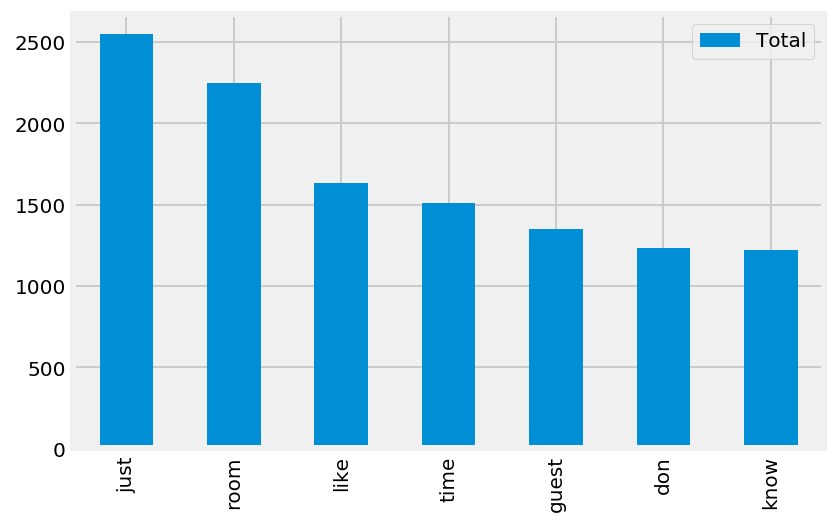

In [62]:
# plot histogram to observe the distribution

Xtrain_total_CVEC[Xtrain_total_CVEC.Total > 1200].plot(kind='bar');

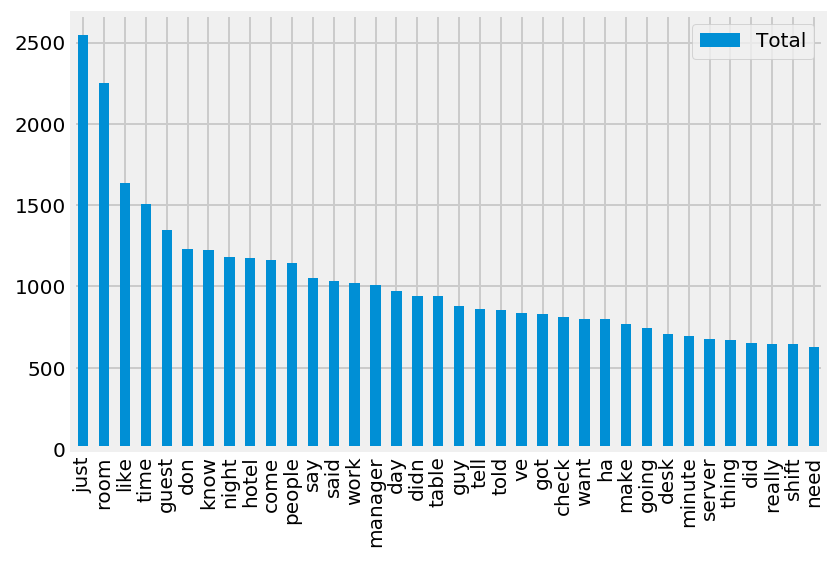

In [63]:
Xtrain_total_CVEC[Xtrain_total_CVEC.Total > 600].plot(kind='bar'); #setting a lower threshold to see more features..

In [64]:
len(Xtrain_total_CVEC[Xtrain_total_CVEC.Total > 600])

36

Using these information, I will run a GridSearchCV with Logistic Regression (one of the more commonly used classifiers that is modified from Linear Regression by converting the continuous y target to a natural logarithm of odds of success for ```TalesFromYourServer``` in this case) and tune the hyperparameters accordingly to optimize the model. Logistic Regression will be evaluated as a classifier as the outcome is binary and the model is interpretable by taking the exponential of each word feature (predictor)'s coefficient to make sense of the number of times as likely that a post comes from class 1 (server tales) over class 0 (frontdesk tales). It is also efficient and by far, the most common classification algorithm. 

In [65]:
pipe = Pipeline([
    ("cvec", CountVectorizer(stop_words = cust_stop_words)), #creating the pipeline with cvec and lr
    ("lr", LogisticRegression())
    ])

In [66]:
pipe_params = {                                  #providing search space for cvec's hyperparameters
    'cvec__max_features': [20, 30, 50, 80],
    'cvec__min_df': [2, 3, 4],
    'cvec__max_df': [.2, .25, .3, .35, .4],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=10, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [67]:
print(gs.best_score_)
gs.best_params_

0.962467320261438


{'cvec__max_df': 0.4,
 'cvec__max_features': 30,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 1)}

In [68]:
gs.best_estimator_

Pipeline(memory=None,
         steps=[('cvec',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.4,
                                 max_features=30, min_df=2, ngram_range=(1, 1),
                                 preprocessor=None,
                                 stop_words=['only', 'bottom', 'itself', 'out',
                                             'than', 'too', 'within', 'being',
                                             'serious', 'she', 'that', 'dow...
                                             'something', 'hereupon', 'nor', ...],
                                 strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('lr',
          

### Which evaluation metric should I use?
- In this case, it probably doesn't really matter - incorrectly mistaking a ```TalesFromTheFrontDesk``` post for a ```TalesFromYourServer``` post doesn't seem much better or worse than incorrectly mistaking a ```TalesFromYourServer``` post for a ```TalesFromTheFrontDesk``` post. Because I believe false positives and false negatives are equally as bad, and the classes (```TalesFromYourServer``` and ```TalesFromTheFrontDesk```) are rather balanced as shown earlier above with class 1 corresponding to a representation of 52% while class 0 having a representation of 48%, I'd probably use accuracy score. Alternatively, we can also assess the roc_auc, confusion matrix, and classification report to examine other classification metrics such as sensitivity (recall), precision, and f1-score for a comprehensive assessment too. Some of these metrics will be examined below in the interpretation section.

In [69]:
gs.score(X_train, y_train)   #scoring tuned model on train set

0.9698307579102281

In [70]:
gs.score(X_test, y_test) #scoring tuned model on test set

0.9271523178807947

Score is very high with some variance as shown from the difference in accuracy scores between the train and test sets... and it has definitely outperformed the baseline accuracy of 0.52 highlighted earlier above. However, let's try to tune the hyperparameters further to see if the score can be further improved:

In [71]:
pipe_params = {                                   #enlarging search space for cvec's hyperparameters
    'cvec__max_features': [100, 150, 200, 250],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .5, .8, .9],
    'cvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe, param_grid=pipe_params, cv=10, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [72]:
print(gs.best_score_)
gs.best_params_

0.9624891067538126


{'cvec__max_df': 0.8,
 'cvec__max_features': 150,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1)}

In [73]:
print(gs.score(X_train, y_train))    ##scoring tuned model on train set and test set
print(gs.score(X_test, y_test))

0.9896983075791023
0.9381898454746137


- Scores remain on the high side, although it seems slightly more overfit than before as the score on the test is ~0.05 lower. However, the difference is not practically significant to raise a concern, it looks more or less optimized still. 
- Let's look at ```TfidfVectorizer``` now as it provides more information about the words in the posts in terms of their discriminating power, other than mere word counts, and determine how that affects the accuracy score. Formula for tf-idf is shown below.

**Let's see how it's calculated:**

Term frequency (`tf`) is the frequency of a certain term in a document:

$$
\mathrm{tf}(t,d) = \frac{N_\text{term}}{N_\text{terms in Document}}
$$

where

- $N_\text{term}$ is the number of times a term/word $t$ appears in document $d$
- $N_\text{terms in Document}$ is the number of terms/words in document $d$

Inverse document frequency (`idf`) is defined as the frequency of documents that contain that term over the whole corpus:

$$
\mathrm{idf}(t, D) = \log\frac{N_\text{Documents}}{N_\text{Documents that contain term}}
$$

where

- $N_\text{Documents}$ is the number of documents in the corpus $D$
- $N_\text{Documents that contain term}$ is the number of documents in $D$ that contain term/word $t$

TF-IDF is then calculated as:

$$
\mathrm{tfidf}(t,d,D) = \mathrm{tf}(t,d) \cdot \mathrm{idf}(t, D)
$$

- Once again, start with a naive model, then explore and tune hyperparameters accordingly.

In [74]:
tvec_naive = TfidfVectorizer(stop_words = cust_stop_words)  #instantiating TfidfVectorizer with customized stop words

X_train_tvec_naive = tvec_naive.fit_transform(X_train).todense()   #fitting tvec and transforming X_train
X_train_tvec_naive_df = pd.DataFrame(X_train_tvec_naive, columns = tvec_naive.get_feature_names())  #converting it into a dataframe for easy lookup.
X_train_tvec_naive_df.shape #checking how array's dimension has changed with the vectorization.

(1359, 12124)

In [75]:
X_train_tvec_naive_df.loc['Total',:]= X_train_tvec_naive_df.sum(axis=0) #summing up the frequency of occurrence for each word feature column and storing it in a new row at the bottom for each word column.
X_train_tvec_naive_df.loc['Total',:].sort_values(ascending=False) #it appears that the word, 'table', is among the top 5 features with high discriminating power

room           54.749208
just           51.716880
table          38.650937
like           38.529685
guest          37.400741
                 ...    
antianxiety     0.027526
pill            0.027526
colouring       0.027526
freebie         0.027526
perked          0.027526
Name: Total, Length: 12124, dtype: float64

In [76]:
Xtrain_total_TVEC_naive = pd.DataFrame(X_train_tvec_naive_df.loc['Total',:].sort_values(ascending=False))  #converting the above into a dataframe for easy viewing.
Xtrain_total_TVEC_naive.head()

,Total
room,54.749208
just,51.716880
table,38.650937
like,38.529685
guest,37.400741


In [77]:
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 1]))  #checking for each of the following frequency, what is the associated number of features in the corpus based in tfidf.
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 5]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 10]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 20]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 50]))
print(len(Xtrain_total_TVEC_naive.loc[Xtrain_total_TVEC_naive['Total'] <= 80]))

10066
11694
11978
12082
12122
12124


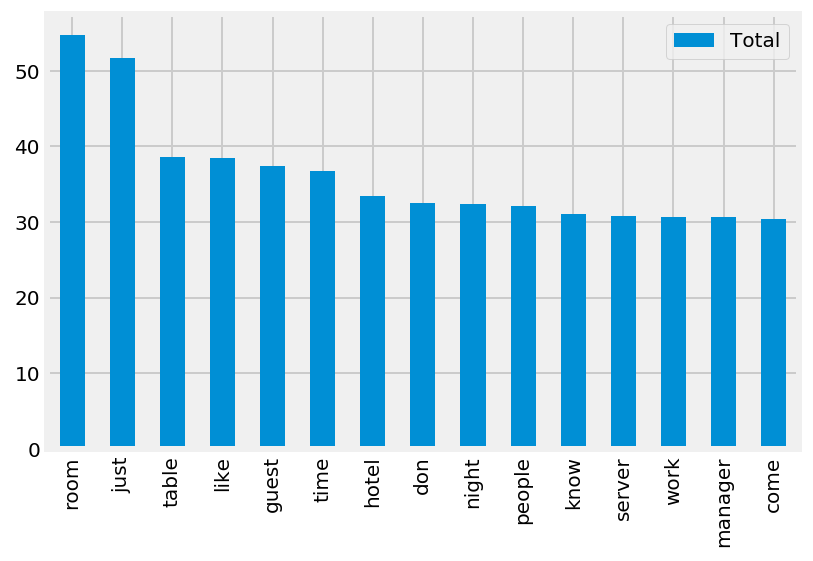

In [78]:
Xtrain_total_TVEC_naive[Xtrain_total_TVEC_naive.Total > 30].plot(kind='bar'); #plotting it to visually explore the data

In [79]:
len(Xtrain_total_TVEC_naive[Xtrain_total_TVEC_naive.Total > 30]) #15 features with tfidf more than 50

15

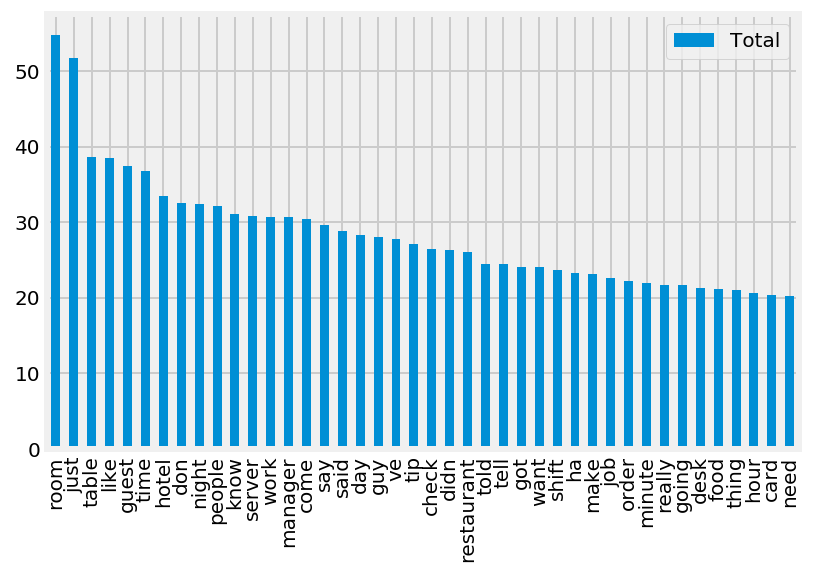

In [80]:
Xtrain_total_TVEC_naive[Xtrain_total_TVEC_naive.Total > 20].plot(kind='bar');  #more features showed up that have more than 30 for tfidf.

In [81]:
len(Xtrain_total_TVEC_naive[Xtrain_total_TVEC_naive.Total > 20]) #features when their tfidf is more than 30

42

- Tune TVEC hyperparameters upon EDA:

In [82]:
pipe2 = Pipeline([
    ("tvec", TfidfVectorizer(stop_words = cust_stop_words)),         #setting up pipeline containing the vectorizer and estimator
    ("lr", LogisticRegression())
])

pipe_params = {
'tvec__max_features': [30, 60, 90],                   #providing a hyperparameter search space.
'tvec__min_df': [2, 3, 4],
'tvec__max_df': [.2, .25, .3, .35, .4],
'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe2, param_grid=pipe_params, cv=10, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train)     #training the model

Fitting 10 folds for each of 90 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [83]:
print(gs.best_score_)
gs.best_params_

0.963202614379085


{'tvec__max_df': 0.4,
 'tvec__max_features': 90,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 1)}

In [84]:
print(gs.score(X_train, y_train))   #scoring tuned model on both train and test sets to get a sense of its bias and variance.
print(gs.score(X_test, y_test))

0.9713024282560706
0.9359823399558499


In [85]:
# further tuning to get better scores:

pipe_params = {
    'tvec__max_features': [100, 150, 200, 250],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3, .4, .5, .8, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe2, param_grid=pipe_params, cv=10, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   45.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1120 out of 1120 | elapsed:  2.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [86]:
print(gs.best_score_)
gs.best_params_

0.967619825708061


{'tvec__max_df': 0.5,
 'tvec__max_features': 250,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [87]:
print(gs.score(X_train, y_train))  #scoring on both train and test sets
print(gs.score(X_test, y_test))

0.9801324503311258
0.9448123620309051


- The difference between the train and test sets for accuracy score is comparable to the better-tuned cvec, logistic regression model mentioned above. However, since the model selected the upper end of the search space for 250 max features, let's tune further to see if the score can further improve.

In [88]:
# further tuning to get better scores:

pipe_params = {
    'tvec__max_features': [200, 250, 300, 500, 700, 1000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3, .4, .5, .8, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs = GridSearchCV(pipe2, param_grid=pipe_params, cv=10, n_jobs = -1, verbose = 1)
gs.fit(X_train, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   47.7s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  3.1min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [89]:
print(gs.best_score_)
gs.best_params_

0.9742483660130719


{'tvec__max_df': 0.4,
 'tvec__max_features': 1000,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

In [90]:
print(gs.score(X_train, y_train))  #scoring on both train and test sets
print(gs.score(X_test, y_test))

0.9904341427520236
0.9646799116997793


Although I can continue to tune since 1000 max features is the upper end of the search space for max features, the scores have increased and the gap between train and test scores have reduced to a pretty good amount (0.99 vs 0.96 for train vs test where the difference is 0.03; cvec's best model had a difference of 0.04 between train and test sets) and the best score of 0.97 is better than the initial fit with tvec (0.96). Let's stick with this!

In [91]:
preds_lr = gs.predict(X_test) #generating lr's predictions

In [92]:
print(confusion_matrix(y_test,preds_lr)) #generating confusion matrix

[[203  14]
 [  2 234]]


In [93]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_lr).ravel() #determining true positives, negatives, false positives, negatives from confusion matrix

In [94]:
print("True Negatives: %s" % tn)   #calculating these as an alternative classfication metric for assessment.
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 203
False Positives: 14
False Negatives: 2
True Positives: 234


Based on the above confusion matrix, the logistic regression model with optimized tfidfvectorizer fared very well with only ~4% misclassification rate (((14+2)/(203+14+2+234)) * 100)! 

In [95]:
print(classification_report(y_test,preds_lr))   #looking at other classification metrics-precision, recall (sensitivity), and f1-score

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       217
           1       0.94      0.99      0.97       236

    accuracy                           0.96       453
   macro avg       0.97      0.96      0.96       453
weighted avg       0.97      0.96      0.96       453



Classification report also indicates high precision, recall (sensitivity) and f1-score (harmonic mean of precision and recall) for both class 1 (```TalesFromYourServer```) and 0 (```TalesFromTheFrontDesk```)!

In [96]:
def roc(probas, true, step=0.01):   #defining function that will help to plot roc auc curve subsequently...
    """
    probas should be a numpy array of predict_probas
    true is a pandas series of true labels
    step is the step size for checking thresholds
    """
    
    probas = probas[:,1]  # The output of predict_proba() is an array of the probabilities for every class, but we only want the probabilities for class 1
    true = true.values    # We need to convert the class labels from a Pandas Series to a numpy array. We do this using the .values attribute
    assert(len(probas) == len(true)) # We're making sure that our probabilities vector is the same length as our true class labels' vector
    
    TPRs = [] # Setting up empty list of True Positive Rate
    FPRs = [] # Setting up empty list of False Positive Rate
    
    for i in np.arange(0.0,1.0,step): # np.arange allows us to use step sizes that are decimals
        preds_class = probas > i # Numpy arrays have a feature called 'broadcasting.' Check the documentation: https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html to see what this does.
        TP = 0 
        FP = 0
        TN = 0
        FN = 0
        for index in range(len(preds_class)): # We're comparing each prediction with each true value here

            if preds_class[index] == 1 and true[index] == 1:
                TP += 1
            elif preds_class[index] == 1 and true[index] == 0:
                FP += 1
            elif preds_class[index] == 0 and true[index] == 0:
                TN += 1 
            elif preds_class[index] == 0 and true[index] == 1:
                FN += 1
                
        TPR = TP/(TP + FN) # Calculating TPR and FPR and appending to our lists
        FPR = FP/(FP + TN)
        
        TPRs.append(TPR)
        FPRs.append(FPR)
         
    plt.rcParams['font.size'] = 14
    plt.plot(FPRs, TPRs, color="orange")
    plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.2, 1.2])
    plt.ylim([-0.2, 1.2])
    plt.title('Receiver Operating Characteristic')
    plt.xlabel("False Positive Rate (1 - Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.show();

In [97]:
probabilities = gs.predict_proba(X_test)  #calculating proabilities for input into roc curve function to plot roc

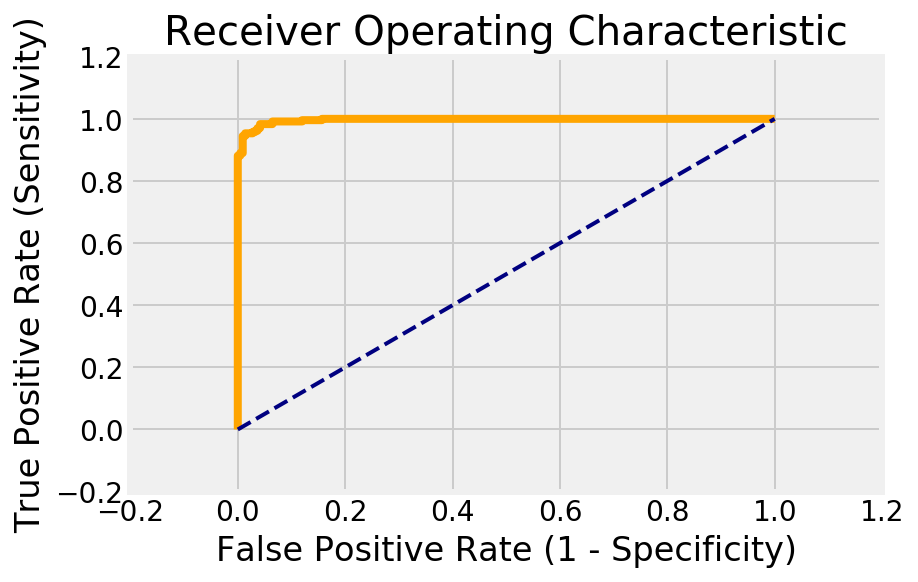

In [98]:
roc(probas = probabilities, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.0001);            # pass in step size

In [99]:
pd.DataFrame(gs.predict(X_test))[0].value_counts() #class 1 is the greater class and so will be used to determine roc_auc score

1    248
0    205
Name: 0, dtype: int64

In [100]:
prob_1 = gs.predict_proba(X_test)[:,1] #obtaining predicted probabilities for class 1, for calculating the roc_auc_score

In [101]:
roc_auc_score(y_test,prob_1) #roc_auc_score is ~1! Very high! Very optimized with regards to true and false positive rates!

0.9965242521284075

As shown in the Receiver Operating Characteristic curve above, the Area Under the Curve (AUC) is very close to 1, suggesting optimized classification of posts from ```TalesFromYourServer``` and ```TalesFromTheFrontDesk``` for Logistic Regression! 

Given that TfidfVectorizer seems to have lower variance (less overfitted) compared to CountVectorizer (as shown above earlier), we will proceed to use TfidfVectorizer for the rest of the model comparisons. Let's now run Naive Bayes Classifier to see how it compares with Logistic Regression! Naive Bayes is considered as the dataset is textual in nature and it is extremely fast and it is part of industry practice for word-related NLP classification problems! 

In [102]:
#instantiate TfidfVectorizer with customized stop words
tvec1 = TfidfVectorizer(stop_words=cust_stop_words)

In [103]:
# Fit our TfidfVectorizer on the training data and transform training data.
X_train_tvec1 = pd.DataFrame(tvec1.fit_transform(X_train).todense(), columns = tvec1.get_feature_names()) 

In [104]:
# Transform our testing data with the already-fit TfidfVectorizer.
X_test_tvec1 = pd.DataFrame(tvec1.transform(X_test).todense(), columns = tvec1.get_feature_names())

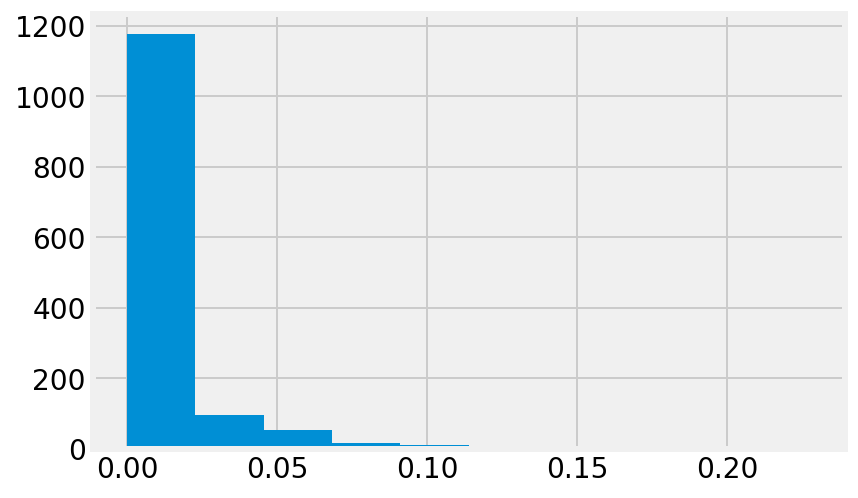

In [105]:
plt.hist(X_train_tvec1['actually']);

- Given that we are using TfidfVectorizer which generates floats rather than 1s or 0s, and features such as the word, 'actually' is clearly not normally distributed as shown above in the histogram, Multinomial Naive Bayes will be used. 

In [106]:
pipe3 = Pipeline([               #pipeline now contains tfidf vectorizer and the Multinomial Naive Bayes estimator
    ("tvec", TfidfVectorizer(stop_words = cust_stop_words)),
    ("mb", MultinomialNB())
    ])

pipe_params = {          #range of hyperparameter search space
    'tvec__max_features': [200, 250, 300, 500, 700, 1000],
    'tvec__min_df': [2, 3],
    'tvec__max_df': [.2, .25, .3, .4, .5, .8, .95],
    'tvec__ngram_range': [(1,1), (1,2)]
}
gs1 = GridSearchCV(pipe3, param_grid=pipe_params, cv=10, n_jobs = -1, verbose = 1)
gs1.fit(X_train, y_train)   #training the model

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   46.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 1680 out of 1680 | elapsed:  3.0min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        n

In [107]:
print(gs1.best_score_)
gs1.best_params_

0.9661437908496732


{'tvec__max_df': 0.8,
 'tvec__max_features': 700,
 'tvec__min_df': 2,
 'tvec__ngram_range': (1, 2)}

Since most of the best hyperparameters fall well within the search space in the pipeline, this is considered more or less optimized and there is no need to expand the search space and do further tuning.

In [108]:
print(gs1.score(X_train, y_train)) #scoring model on both trin and test sets
print(gs1.score(X_test, y_test))

0.9742457689477557
0.9624724061810155


The above shows a decrease in variance as the difference between the train and test score is 0.01 which is lower than that for the Logistic Regression model! Let's compare alternative classification metrics between Multinomial Naive Bayes and Logistic Regression!

In [109]:
preds_mb = gs1.predict(X_test) #generating mb's predictions

In [110]:
print(confusion_matrix(y_test,preds_mb)) #generating confusion matrix

[[209   8]
 [  9 227]]


In [111]:
tn, fp, fn, tp = confusion_matrix(y_test, preds_mb).ravel() #determining true positives, negatives, false positives, negatives from confusion matrix

In [112]:
print("True Negatives: %s" % tn)   #looking at alternative classification metrics
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 209
False Positives: 8
False Negatives: 9
True Positives: 227


When examining the confusion matrix, the multinomial naive bayes model with optimized tfidfvectorizer fared very well with only ~4% misclassification rate (((8+9)/(209+8+9+227)) * 100), almost identical to that of the logistic regression!

In [113]:
print(classification_report(y_test,preds_mb))  #looking at other metrics like precision, recall (also known as sensitivity), and F1-Score

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       217
           1       0.97      0.96      0.96       236

    accuracy                           0.96       453
   macro avg       0.96      0.96      0.96       453
weighted avg       0.96      0.96      0.96       453



Classification report also showed encouraging result, not much inferior relative to Logistic Regression. Specifically, the Logistic Regression outperformed Multinomial Naive Bayes in terms of sensitivity in detecting the ```TalesFromYourServer``` but the Multinomial Naive Bayes has less false positives when detecting the ```TalesFromYourServer``` compared to Logistic Regression. 

In [114]:
probabilities_mb = gs1.predict_proba(X_test) #calculating proabilities for input into roc curve function to plot roc

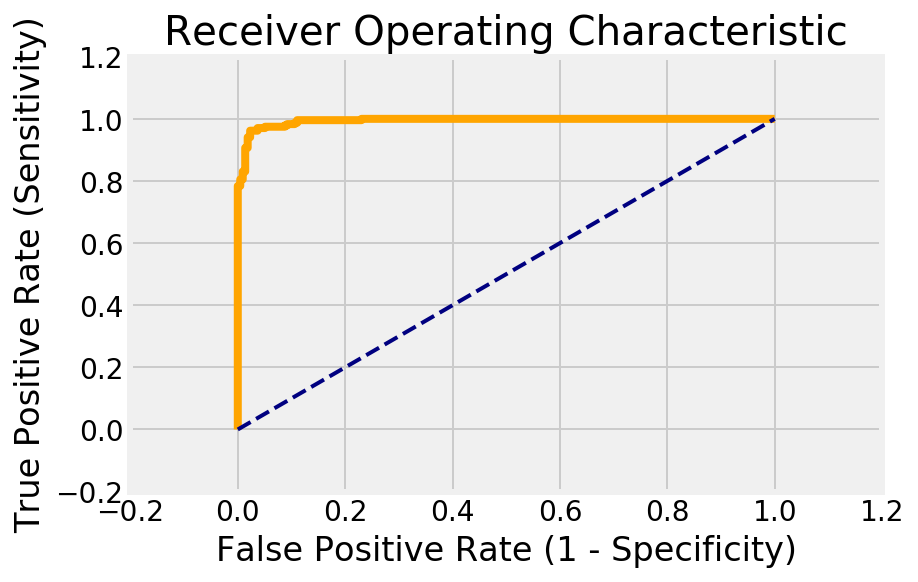

In [115]:
roc(probas = probabilities_mb, # pass in series of probabilities 
    true = y_test,          # pass in series of true values
    step=0.0001);            # pass in step size

In [116]:
pd.DataFrame(gs1.predict(X_test))[0].value_counts() #class 1 is the greater class and so will be used to determine roc_auc score

1    235
0    218
Name: 0, dtype: int64

In [117]:
prob_2 = gs1.predict_proba(X_test)[:,1]  #calculating proabilities to determine roc_auc_score below

In [118]:
roc_auc_score(y_test,prob_2) #roc_auc_score is 0.99! Very high! very optimized with regards to true and false positive rates!

0.9938490978676873

- As shown in the Receiver Operating Characteristic curve above, the Area Under the Curve (AUC) is 0.99, which is very close to 1, suggesting optimized classification of posts from ```TalesFromYourServer``` and ```TalesFromTheFrontDesk``` for Multinomial Naive Bayes too!


- As both Logistic Regression and Naive Bayes seem to perform equally well, we will examine the interpretability of the coefficients for both models to determine which will be put forth as the model of choice to address the problem statement, in the following section.

# Interpretation of Results
---
[Click here to go back to Contents](#Contents)

### Comparisons across both models of various classification metrics

In the summary table below, 
- Class 0 refers to ```TalesFromTheFrontDesk``` and Class 1 refers to ```TalesFromYourServer```
- Accuracy refers to the total number of correctly classified categories, where the Positive class refers to class 1 and the Negative class refers to class 0 and True Positives (TP), True Negatives (TN), False Positives (FP), False Negatives (FN) fit into the formula: (TP+TN)/(TP+TN+FP+FN)
- True Positives refer to ```TalesFromYourServer``` correctly classified as ```TalesFromYourServer```
- True Negatives refer to ```TalesFromTheFrontDesk``` correctly classified as ```TalesFromTheFrontDesk```
- False Positives refer to ```TalesFromTheFrontDesk``` incorrectly classified as ```TalesFromYourServer```
- False Negatives refer to ```TalesFromYourServer``` incorrectly classified as ```TalesFromTheFrontDesk```
- Precision refers to the positive predictive value which is defined as (TP)/(TP+FP)
- Recall is also known as sensitivity, hit rate, and true positive rate and is defined as (TP)/(TP+FN)
- F1-Score refers to the harmonic mean of Precision and Recall (2 x ((precision x recall)/(precision + recall)))
- ROC AUC refers to the Area Under the Curve in the Receiver Operating Characteristic graph

|<center><font size='3'>Model<center>|<center><font size='3'>Accuracy Score<br>(on test set)<center>|<center><font size='3'>Classification<br>Categories<center>|<center><font size='3'>Classification Report<br>Metrics<center>|<center><font size='3'>ROC AUC<center>|
|---|---|---|---|---|
|<center><font size='2'>***Logistic Regression<br>with<br>TfidfVectorizer (chosen)***<center>|<center>***0.96***<center>|<center>***True Negatives: 203***<br>***False Positives: 14***<br>***False Negatives: 2***<br>***True Positives: 234***<center>|***Precision for class 0: 0.99***<br>***class 1: 0.94***<br>***Recall for class 0: 0.94***<br>***class 1: 0.99***<br>***F1-Score for class 0: 0.96***<br>***class 1: 0.97***|<center>***~1***<center>|
|<center><font size='2'>*Multinomial Naive Bayes<br>with<br>TfidfVectorizer*<center>|<center>0.96<center>|<center>True Negatives: 209<br>False Positives: 8<br>False Negatives: 9<br>True Positives: 227<center>|Precision for class 0: 0.96<br>class 1: 0.97<br>Recall for class 0: 0.96<br>class 1: 0.96<br>F1-Score for both classes: 0.96|<center>0.99<center>|                                           

The above table showed that both models performed about equally well, well above the baseline accuracy score of 0.52, except for minor differences in precision and recall with either class 0 or class 1. For instance, Logistic Regression is more sensitive in identifying ```TalesFromYourServer```(class 1), given that its recall (sensitivity) for class 1 is 0.99 whereas that for Multinomial Naive Bayes is 0.96) and perhaps because of this, it has more false positives compared to the Multinomial Naive Bayes model given that its precision score for class 1 is 0.94 which is lower than that of Multinomial Naive Bayes which is 0.97. The ROC AUC for Logistic Regression is also slightly higher than that of Multinomial Naive Bayes as shown in the tabulation above. Nevertheless, both models' ROC AUC are quite close to 1 which means that the false positive and true positive rates were highly optimized.

The very high classification accuracies of both models (and in fact a lower variance for Multinomial Naive Bayes mentioned above) might suggest that the chosen subreddits are not similar enough to be deemed challenging to distinguish.

Since both models shown above perform almost identically well, which model should I choose as the production model? Let's explore the coefficients derived from both models to decide.

### Extracting coefficients from Multinomial Naive Bayes for interpretation..

In [119]:
#instantiate TfidfVectorizer using optimized hyperparameters from gs1 above
tvec_mb = TfidfVectorizer(stop_words=cust_stop_words, max_df=0.8, max_features=700, min_df=2, ngram_range=(1, 2))

In [120]:
# Fit our TfidfVectorizer on the training data and transform training data.
X_train_tvec_mb = pd.DataFrame(tvec_mb.fit_transform(X_train).todense(), columns = tvec_mb.get_feature_names()) 

In [121]:
# Transform our testing data with the already-fit TfidfVectorizer.
X_test_tvec_mb = pd.DataFrame(tvec_mb.transform(X_test).todense(), columns = tvec_mb.get_feature_names())

In [122]:
mb_fin = MultinomialNB()  #instantiating the Multinomial Naive Bayes

In [123]:
mb_fin.fit(X_train_tvec_mb, y_train)  #fitting the model to obtain the coefficients later on.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [124]:
mb_coefs = pd.DataFrame({'variable':tvec_mb.get_feature_names(),    #generating a dictionary of coefficients and corresponding feature names to determine if they are interpretable...
                            'coef':mb_fin.coef_.T.ravel(),
                            'abs_coef':np.abs(mb_fin.coef_.T.ravel()),
                            'times_as_likely_frm_servertales':np.exp(mb_fin.coef_.T.ravel())}) #calculating the number of times as likely for post come from TalesFromYourServer
mb_coefs.sort_values('abs_coef', inplace=True, ascending=False)

mb_coefs.head(20) #this shows the word features ranked in terms of their discriminating power 

,variable,coef,abs_coef,times_as_likely_frm_servertales
591,suite,-8.457423,8.457423,0.000212
24,audit,-8.457423,8.457423,0.000212
407,night auditor,-8.457423,8.457423,0.000212
401,na,-8.457423,8.457423,0.000212
184,elevator,-8.457423,8.457423,0.000212
208,fd,-8.457423,8.457423,0.000212
209,fda,-8.457423,8.457423,0.000212
647,upgrade,-8.457423,8.457423,0.000212
149,dg,-8.457423,8.457423,0.000212
25,auditor,-8.457423,8.457423,0.000212


In [125]:
mb_coefs.tail(20) #looking at the bottom 20 coefficients and their associated word features. All are negative coefficients! 

,variable,coef,abs_coef,times_as_likely_frm_servertales
138,day,-5.375712,5.375712,0.004628
512,said,-5.367988,5.367988,0.004664
326,know,-5.334597,5.334597,0.004822
654,ve,-5.315583,5.315583,0.004914
133,customer,-5.256863,5.256863,0.005212
315,job,-5.245411,5.245411,0.005272
172,drink,-5.183001,5.183001,0.005611
164,don,-5.169071,5.169071,0.005690
374,manager,-5.155634,5.155634,0.005767
445,people,-5.149912,5.149912,0.005800


- Multinomial Naive Bayes' coefficients can be interpreted by taking their exponentials (```np.exp()```). The output is the number of times as likely for the post containing that particular word feature to come from ```TalesFromYourServer``` (class 1). It appears that all of the "important" word features from the Multinomial Naive Bayes model have negative coefficients - this means that the model will tend to predict that a given post is unlikely to belong under ```TalesFromYourServer``` given each of the 700 word features used in training the Multinomial Naive Bayes, suggesting that its predictions will be imbalanced and skewed towards ```TalesFromTheFrontDesk```. This could explain why Multinomial Naive Bayes generated more False Negatives than Logistic Regression does (9 for Multinomial Naive Bayes vs 2 for Logistic Regression based on table above). It is also worth noting that Multinomial Naive Bayes' ROC AUC as shown in the table above is slightly lower than Logistic Regression's. Logistic Regression moreover also presents more interpretable results as shown below.

### Extracting coefficients from Logistic Regression for interpretation...

In [126]:
#instantiate TfidfVectorizer using optimized hyperparameters from gs above
tvec_lr = TfidfVectorizer(stop_words=cust_stop_words, max_df=0.4, max_features=1000, min_df=2, ngram_range=(1, 2))

In [127]:
# Fit our TfidfVectorizer on the training data and transform training data.
X_train_tvec_lr = pd.DataFrame(tvec_lr.fit_transform(X_train).todense(), columns = tvec_lr.get_feature_names()) 

In [128]:
# Transform our testing data with the already-fit TfidfVectorizer.
X_test_tvec_lr = pd.DataFrame(tvec_lr.transform(X_test).todense(), columns = tvec_lr.get_feature_names())

In [129]:
lr_fin = LogisticRegression() #instantiating Logistic Regression

In [130]:
lr_fin.fit(X_train_tvec_lr, y_train)  #training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [131]:
lr_coefs = pd.DataFrame({'variable':tvec_lr.get_feature_names(),    #generating coefficent dictionary for fitted Logistic Regression
                            'coef':lr_fin.coef_.T.ravel(),
                            'abs_coef':np.abs(lr_fin.coef_.T.ravel()),
                            'times_as_likely_frm_servertales':np.exp(lr_fin.coef_.T.ravel())}) #calculating the number of times as likely for post come from TalesFromYourServer
lr_coefs.sort_values('abs_coef', inplace=True, ascending=False)

lr_coefs.head(20) #this shows the word features ranked in terms of their discriminating power (be it positive or negative, as well as the number of times as likely for the post to fall under class 1 - TalesFromYourServer for the existence of each word feature)

,variable,coef,abs_coef,times_as_likely_frm_servertales
723,room,-5.369243,5.369243,0.004658
424,hotel,-4.787399,4.787399,0.008334
376,guest,-4.160609,4.160609,0.015598
856,table,4.107502,4.107502,60.794669
218,desk,-3.872400,3.872400,0.020808
760,server,3.326763,3.326763,27.848038
714,restaurant,3.058843,3.058843,21.302903
883,tip,2.598207,2.598207,13.439622
612,order,2.278323,2.278323,9.760300
198,customer,1.902886,1.902886,6.705215


In [132]:
lr_coefs.tail(20) #looking at the bottom 20 coefficients and their associated word features.

,variable,coef,abs_coef,times_as_likely_frm_servertales
131,cheap,0.005685,0.005685,1.005701
655,position,0.005673,0.005673,1.005689
378,guy come,-0.005451,0.005451,0.994564
565,mobile,0.005292,0.005292,1.005306
534,make sure,0.005175,0.005175,1.005189
410,hired,-0.005078,0.005078,0.994935
817,stand,-0.004646,0.004646,0.995365
550,mentioned,0.004412,0.004412,1.004422
954,watching,0.004329,0.004329,1.004339
457,just don,-0.003545,0.003545,0.996461


In [133]:
lr_coefs_sort_by_coef = lr_coefs.sort_values('coef', ascending=False) #sorting lr_coefs in descending order based on coefs

In [134]:
lr_coefs_top_10 = lr_coefs_sort_by_coef.head(10) #segmenting out the top 10 coefs (top 10 word features positively correlated to log of odds of class 1)

In [135]:
lr_coefs_btm_10 = lr_coefs_sort_by_coef.tail(10) #segmenting out the bottom 10 coefs (top 10 word features negatively correlated to log of odds of class 1)

In [136]:
lr_coefs_top_btm_10 = pd.concat([lr_coefs_top_10,lr_coefs_btm_10], axis=0) #combining both top and bottom 10 coefs

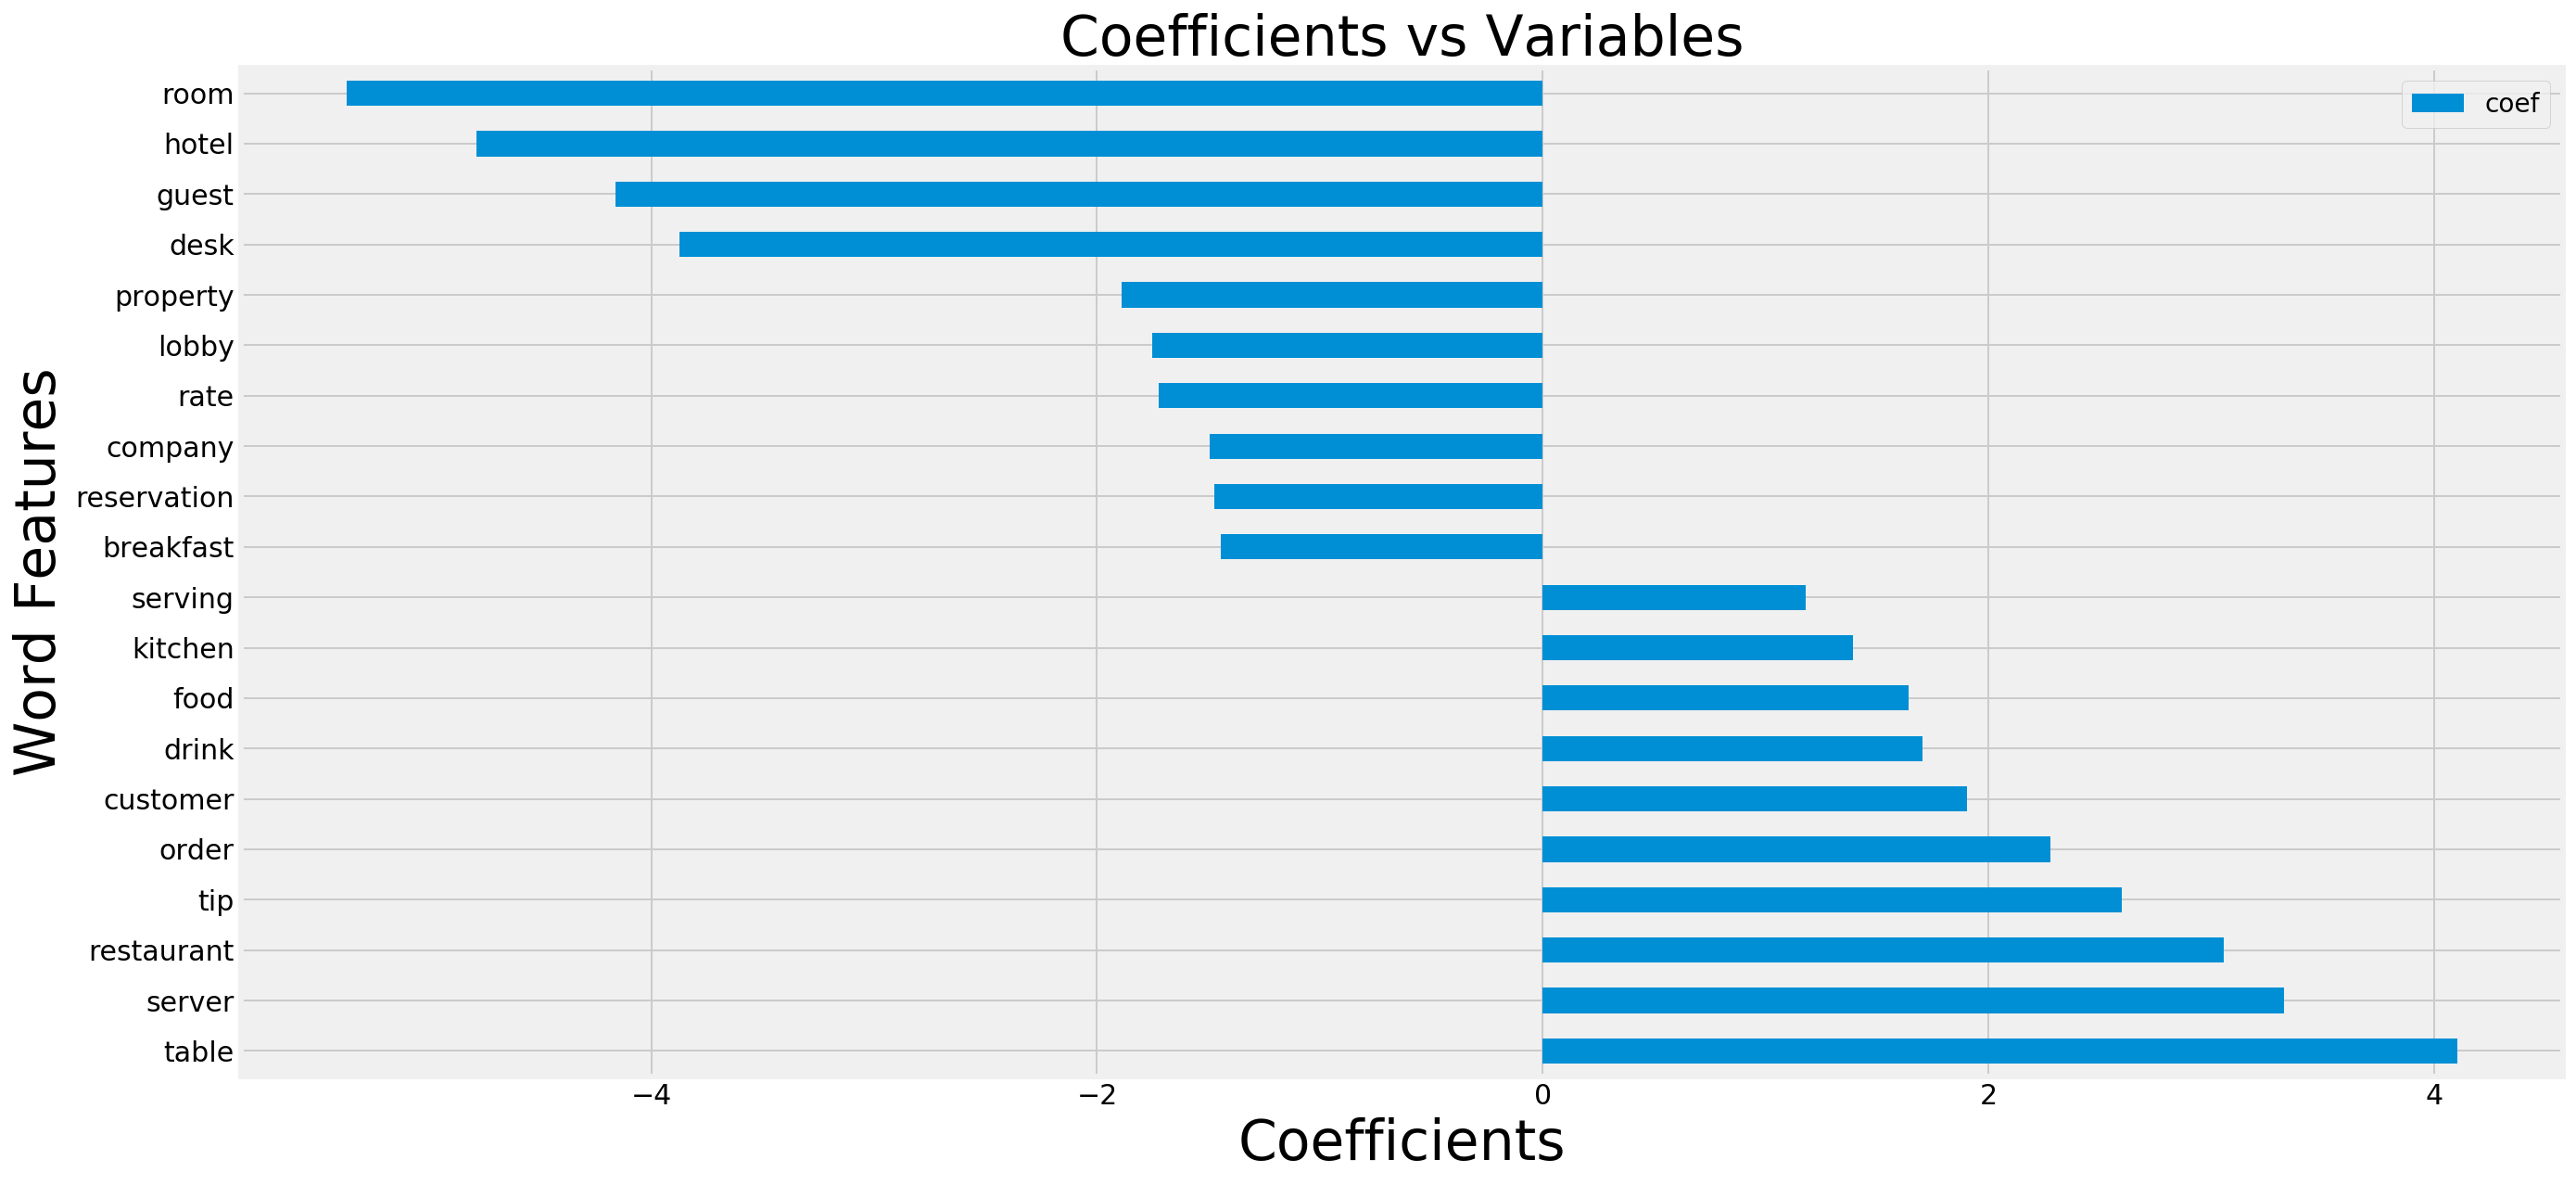

In [137]:
#plotting top 10 and bottom 10 coefs sorted in descending order to visualize the correlation of word features with the target class 1 - TalesFromYourServer
ax = lr_coefs_top_btm_10.sort_values('coef', ascending=False)[['variable','coef']].plot.barh('variable',figsize=(20,10))
ax.set_title("Coefficients vs Variables", fontsize=30)
ax.set_xlabel("Coefficients", fontsize=30)
ax.set_ylabel("Word Features", fontsize=30)
plt.xticks(size=15)
plt.yticks(size=15);

In [138]:
np.exp(4.11) #calculating how many more times as likely will the post come from TalesFromYourServer with each appearance of the word, "table" in the post.

60.94671756962223

In [139]:
np.exp(-5.37) #calculating how many more times as likely will the post come from TalesFromYourServer with each appearance of the word, "room" in the post.

0.004654131310283272

- The model with Logistic Regression on the other hand, has a mixture of both positive and negative coefficients for its "important" word features and this means that it has the potential to yield balanced predictions (can predict a post to be from either ```TalesFromYourServer``` or ```TalesFromTheFrontDesk```) and is not skewed to either subreddit, unlike the model with Multinomial Naive Bayes.


- From the above dataframe of Logistic Regression coefficients, 4.11 is the coefficient for the word "table" that is extracted from the ```lr_coefs.head(20)```  shown above. With each appearance of the word, "table", in a given post, that post is 61 times as likely to come from the ```TalesFromYourServer``` subreddit. 


- However, with each appearance of another word, "room", in a given post, that post is 0.005 times as likely to come from the ```TalesFromYourServer```, meaning that the post is alot more likely to come from ```TalesFromTheFrontDesk```, which makes sense! Similarly, the -5.37 is the coefficient for the word, "room", extracted from the ```lr_coefs.head(20)```. This shows that the Logistic Regression is working just as we expect in classifying posts from the 2 above-mentioned subreddits!


- Given the balanced interpretability of the Logistic Regression model, this will be the model of choice to address the problem of classifying given posts to cut down time required to pre-filter posts by each of the agencies and organizations of interest as mentioned in the foremost section of this notebook!

# Model Evaluation and Limitations
---
[Click here to go back to Contents](#Contents)

- For both Logistic Regression and Multinomial Naive Bayes models, the estimators' hyperparameters were not tuned together with those of CountVectorizer and TfidfVectorizer as it was time-consuming. It would be interesting to see how the scores will improve or decrease if the estimators' hyperparameters are tuned simultaneously. An alternative would be to use ```RandomizedSearchCV``` instead to circumvent limitations in terms of computing power and time constraints, so that both estimator and vectorizers can be tuned simultaneously.


- There were simplifying assumptions adopted in both models - for Logistic Regression, it was assumed that each of the word features in the X corpus were linearly related to the log of odds and that the word features (or predictors) were independent of one another, and for Multinomial Naive Bayes, independence among word predictors was also assumed. It can be unrealistic to assume independence between words given that in reality, words used in a sentence are to a certain extent related to one another depending on their relative distances to one another in a sentence.


- Lack of full understanding behind how Reddit works resulted in the removal of empty posts from consideration. This can potentially be problematic as users can encapsulate the content of their posts within the "Title" of their posts, leaving the 'selftext' section of the post empty. These posts would then have been mistaken for null posts that are not useful in predicting the subreddit category the posts belong under and hence removed, unknowingly. Fortunately for the 2 subreddits chosen, not a lot of those posts have been removed relative to the total number of unique posts scraped, as only less than 10% (inclusive of duplicated posts, calculated earlier above) of the data were dropped. 


- Given that both models used performed almost as well, a third classifier such as K-Nearest Neighbors classifier could be trained on the model and tested to determine if there is any difference in accuracy (and in other classification metrics) from the Logistic Regression and Naive Bayes models.


- There were only 900+ and 800+ unique posts scraped from the ```TalesFromYourServer``` and ```TalesFromTheFrontDesk``` respectively. As with all data science problems, we can consider gathering more data, beyond 1000 posts per subreddit to examine how the accuracy scores change (whether further improve or decrease). 


# Conclusion and Business Recommendations
---
[Click here to go back to Contents](#Contents)

- The model used was able to predict with 96% accuracy which posts come from ```TalesFromYourServer``` and which come from ```TalesFromTheFrontDesk```. This is hence a recommended solution for trade unions and agencies like NTUC and recruitment firms in the hospitality and food and beverage industries to pre-filter online staff posts, so that they can cut straight to addressing those posts like addressing server/frontdesk-specific staff concerns/dissatisfaction that will in turn maximize service standards, and eventually boost customer experience, business value, and competitiveness.


- A caveat however, is that the model was built on Reddit posts. The Reddit community is primarily non-Singaporean and thus [cultural differences](https://www.singaporeexpats.com/resources-in-singapore/articles/84/etiquette-differences-between-singapore-and-america.htm) may render such a model less relevant in Singapore. This proposal however presents a good conceptual model to begin with - localized data could be collected from local variations of Reddit such as [Hardware Zone](https://forums.hardwarezone.com.sg) to gather more local server and frontdesk staff opinion at work to train the model accordingly for generalizability. A point to note is that 'singlish' terms may surface in EDA of such local platforms, which may throw off the model's predictions.


- This model could also be tested on other similar but distinct sub-sectors of the service industry too to expedite parsing of online posts with the eventual aim of boosting staff morale, which will in turn translate into enhanced customer experiences! 

# Sources
---
[Click here to go back to Contents](#Contents)
- https://www.reddit.com/
- https://www.datacamp.com/community/tutorials/wordcloud-python
- https://www.reddit.com/r/TalesFromYourServer
- https://www.reddit.com/r/TalesFromTheFrontDesk
- https://www.ntuc.org.sg/wps/portal/up2/home/industrialrelations/unionsandu
- https://www.singaporeexpats.com/resources-in-singapore/articles/84/etiquette-differences-between-singapore-and-america.htm
- https://forums.hardwarezone.com.sg